In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!/usr/bin/env python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## getting dataset
import os
from os import listdir

#########################
# configuration
#########################
data_path = './drive/MyDrive/DS Project Notebook Files/DS_Project_Code/Jeremias/results/'
visualization_dates = [('2022-02-01','2022-03-01'), ('2018-01-01','2022-12-31'), ('2019-01-01','2019-12-31'), ('2020-01-01','2020-12-31'), ('2021-01-01','2021-12-31'),('2019-04-10','2019-04-30'), ('2020-06-01','2020-08-31'), ('2019-07-15','2019-08-15')]


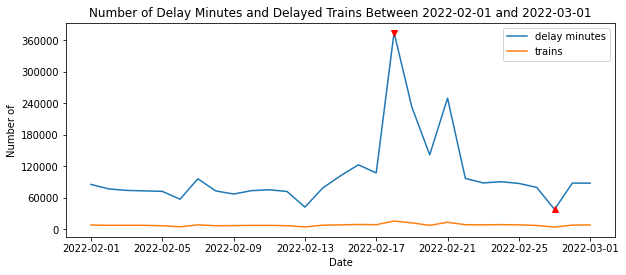

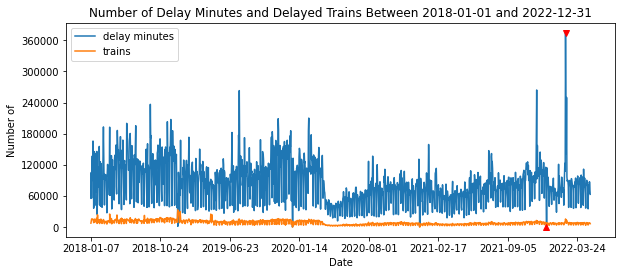

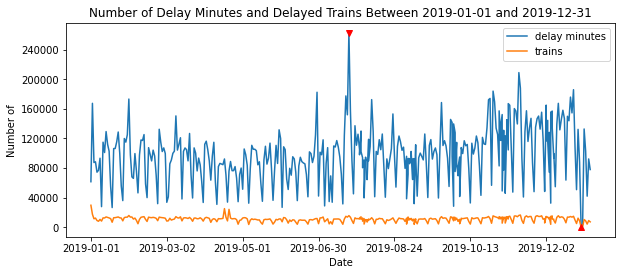

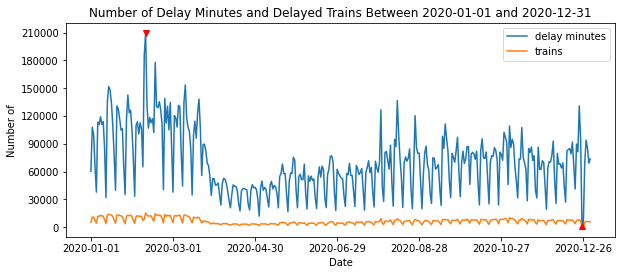

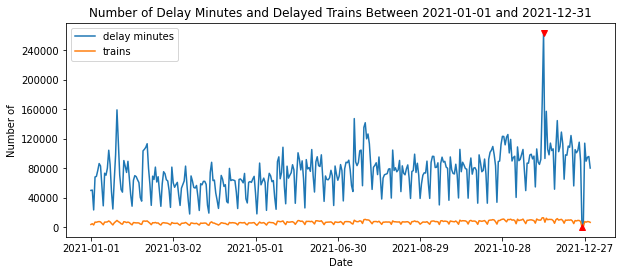

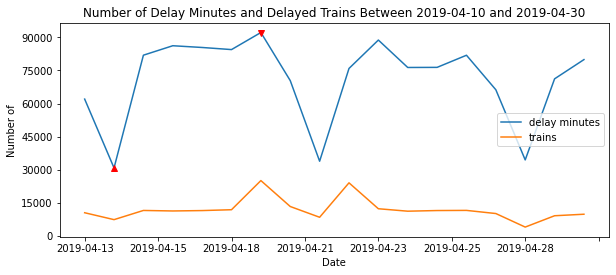

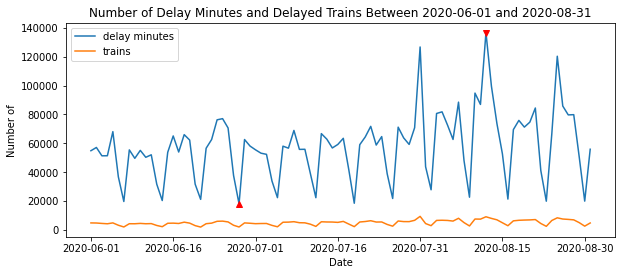

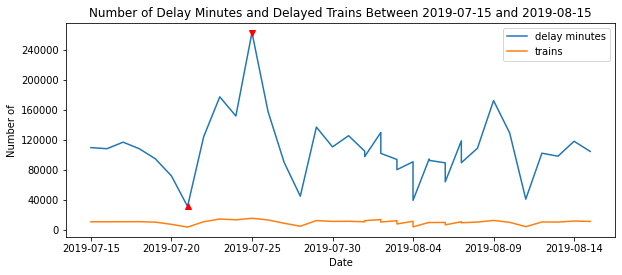

In [ ]:
#delay data time series
from matplotlib.ticker import MaxNLocator

#some function
def cm2inch(value):
        return value/2.54

#load data
delay_data = pd.read_csv(data_path + 'train_delay.csv',header=0)

#data preparation
year_data = delay_data.sort_values(by='ORIGIN_DEPARTURE_DATE')
year_data.set_index('ORIGIN_DEPARTURE_DATE',drop=False,inplace=True)
date = year_data['ORIGIN_DEPARTURE_DATE']
minutes = year_data['minutes']#.rolling(window=4).mean()
avg = year_data['minutes'].rolling(window=60).mean()
trains = year_data['#trains']

#visualize time series
for d in visualization_dates:
  #create figure
  fig,axes = plt.subplots(figsize=(cm2inch(25), cm2inch(10)))
  axes.plot(date.loc[d[0]:d[1]],minutes.loc[d[0]:d[1]], label= 'delay minutes')
  #axes.plot(date.loc[d[0]:d[1]],avg.loc[d[0]:d[1]], label= 'avg delay')
  axes.plot(date.loc[d[0]:d[1]], trains.loc[d[0]:d[1]], label= 'trains')
  axes.yaxis.set_major_locator(MaxNLocator(8)) 
  axes.xaxis.set_major_locator(MaxNLocator(8)) 

  p = minutes.loc[d[0]:d[1]].values.tolist().index(minutes.loc[d[0]:d[1]].max())
  plt.plot(date.loc[d[0]:d[1]].values.tolist()[p:p+1],minutes.loc[d[0]:d[1]].values.tolist()[p:p+1], marker="v", color='red')

  p = minutes.loc[d[0]:d[1]].values.tolist().index(minutes.loc[d[0]:d[1]].min())
  plt.plot(date.loc[d[0]:d[1]].values.tolist()[p:p+1],minutes.loc[d[0]:d[1]].values.tolist()[p:p+1], marker="^", color='red')
  
  axes.legend()
  plt.xlabel("Date")
  plt.ylabel("Number of")
  plt.title("Number of Delay Minutes and Delayed Trains Between " + d[0] +" and " + d[1])
  file_name = (d[0] + '_' + d[1])
  plt.savefig(data_path + file_name + '.png', dpi=300)
  #plt.show()

In [ ]:
#show data for easter
year_data.loc['2019-04-18':'2019-04-22']

,FINANCIAL_YEAR_PERIOD,ORIGIN_DEPARTURE_DATE,ENGLISH_DAY_TYPE,minutes,#delays,#trains
ORIGIN_DEPARTURE_DATE,,,,,,
2019-04-18,2019/20_P01,2019-04-18,WD,84438.5,18444.0,11854.0
2019-04-19,2019/20_P01,2019-04-19,BH,92176.0,31268.0,25065.0
2019-04-20,2019/20_P01,2019-04-20,SA,70372.0,17713.0,13310.0
2019-04-21,2019/20_P01,2019-04-21,SU,33838.5,10632.0,8435.0
2019-04-22,2019/20_P01,2019-04-22,BH,75879.5,28341.0,24044.0


In [ ]:
# top 5 Days with least delay within the dataset
year_data.sort_values(by='minutes').head()

,FINANCIAL_YEAR_PERIOD,ORIGIN_DEPARTURE_DATE,ENGLISH_DAY_TYPE,minutes,#delays,#trains
ORIGIN_DEPARTURE_DATE,,,,,,
2021-12-25,2021/22_P10,2021-12-25,XD,220.0,105.0,77.0
2019-12-25,2019/20_P10,2019-12-25,XD,381.0,130.0,106.0
2020-12-25,2020/21_P10,2020-12-25,XD,950.0,121.0,113.0
2018-12-25,2018/19_P10,2018-12-25,XD,1526.0,33586.0,32971.0
2019-12-26,2019/20_P10,2019-12-26,BD,3378.0,675.0,541.0


In [ ]:
# top 5 Days with most delay within the dataset
year_data.sort_values(by='minutes').tail()

,FINANCIAL_YEAR_PERIOD,ORIGIN_DEPARTURE_DATE,ENGLISH_DAY_TYPE,minutes,#delays,#trains
ORIGIN_DEPARTURE_DATE,,,,,,
2018-09-19,2018/19_P07,2018-09-19,WD,236666.43,27870.0,15768.0
2022-02-21,2021/22_P12,2022-02-21,WD,249912.00,26449.0,13394.0
2019-07-25,2019/20_P05,2019-07-25,WD,263120.70,31490.0,15576.0
2021-11-27,2021/22_P09,2021-11-27,SA,264299.50,23451.0,12628.0
2022-02-18,2021/22_P12,2022-02-18,WD,375066.25,25129.0,15727.0


In [ ]:
#generate the monthly delay for 2019-2021
import datetime

def last_month_day(year, month):
    year_month = year + '-' + month + '-'
    year = int(year)
    month = int(month)
    if (month == 2):
      if(year % 100 != 0) and (year % 4 == 0) or (year % 400 == 0):
        return year_month + '29'
      else:
        return year_month + '28'
    elif(month == 4 or month == 6 or month == 9 or month == 11):
      return year_month + '30'
    else:
      return year_month + '31'

month_delay_dict = {}
for year in ['2021', '2020', '2019']:
  month_delay_dict[year] = {}
  for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    first_month_day = year + '-' + month + '-01'
    month_word = datetime.date(int(year),int(month),1).strftime("%B")
    month_delay_dict[year][month_word] = minutes.loc[first_month_day:last_month_day(year, month)].sum()

month_delay = pd.DataFrame(month_delay_dict).transpose()
month_delay = month_delay.div(month_delay.sum(axis=1),axis=0)*100
month_delay

,January,February,March,April,May,June,July,August,September,October,November,December
2021,7.867429,6.690952,6.155130,6.044437,7.090682,8.077221,9.947716,8.096551,8.464498,9.644851,11.182825,10.737708
2020,12.299813,13.111959,11.044408,4.505844,5.294176,5.954468,6.683034,8.148478,7.967880,8.806606,7.866381,8.316952
2019,6.981211,5.768623,6.356797,5.518877,6.349786,5.834249,7.549782,10.415596,9.519115,11.269188,12.805484,11.631292


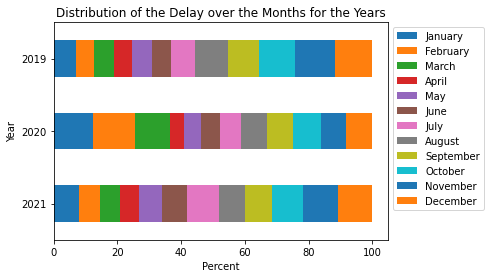

In [ ]:
#generate stacked bar chart
month_delay.plot(kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel("Percent")
plt.ylabel("Year")
plt.title("Distribution of the Delay over the Months for the Years")
plt.savefig(data_path + 'monthlydelay_dist.png', dpi=300, bbox_inches='tight')
plt.show()